In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.cm as cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
import torchvision
import keras
from keras import layers
from keras.models import Sequential, Model
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Activation, Flatten, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D 
from keras.layers import Conv2D, MaxPooling2D,Conv2DTranspose
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D

Using TensorFlow backend.


In [0]:
#svhn_trainset = torchvision.datasets.SVHN('./train_32x32.mat', split='train', transform=None, target_transform=None, download=False)
#svhn_testset = torchvision.datasets.SVHN('./SVHN', split='test', transform=None, target_transform=None, download=False)
svhn_extraset = torchvision.datasets.SVHN('./SVHN', split='extra', transform=None, target_transform=None, download=True)

RuntimeError: ignored

In [0]:
#svhn_extraset.data = svhn_extraset.data.reshape(np.shape(svhn_extraset.data)[0] , np.shape(svhn_extraset.data)[2], np.shape(svhn_extraset.data)[3], np.shape(svhn_extraset.data)[1])
#svhn_trainset.data = svhn_trainset.data.reshape(np.shape(svhn_trainset.data)[0] , np.shape(svhn_trainset.data)[2], np.shape(svhn_trainset.data)[3], np.shape(svhn_trainset.data)[1])

In [0]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat):
        #print(img[i].shape)
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

In [0]:
np.shape(svhn_extraset.data)

(531131, 32, 32, 3)

In [0]:
plot_images(svhn_extraset.data, svhn_extraset.labels, 2, 8)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [0]:
print(np.unique(svhn_extraset.labels))

[0 1 2 3 4 5 6 7 8 9]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(svhn_extraset.data,svhn_extraset.labels,test_size = 0.2,random_state = 4)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


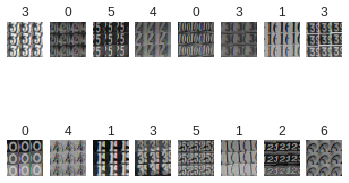

In [0]:
plot_images(x_train, y_train, 2, 8)

In [0]:
plt.title("Training Data Distribution SVHN")
plt.xlabel("Label")
plt.ylabel("Count")
plt.hist(y_train);
plt.xticks(list(range(0,10)))
plt.show()

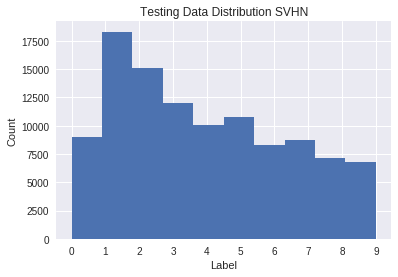

In [0]:
plt.title("Testing Data Distribution SVHN")
plt.xlabel("Label")
plt.ylabel("Count")
plt.hist(y_test);
plt.xticks(list(range(0,10)))
plt.show()

In [0]:
#X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.13, random_state=7)

In [0]:
np.shape(x_train)

(424904, 3, 32, 32)

In [0]:
np.shape(y_train_oe)

(424904, 10)

In [0]:
y_train_oe = keras.utils.to_categorical(y_train,num_classes = 10)
y_test_oe = keras.utils.to_categorical(y_test,num_classes = 10)
#y_val_oe = keras.utils.to_categorical(y_val,num_classes = 10)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(3,32,32),data_format="channels_first", activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2) ,data_format="channels_first",))
model.add(Conv2D(32, (3,3), activation='relu',data_format="channels_first",))
model.add(MaxPooling2D(pool_size=(2,2),data_format="channels_first",))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='relu',data_format="channels_first",))
model.add(Conv2D(64, (3,3), activation='relu',data_format="channels_first",))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='relu',data_format="channels_first", ))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr = 0.001,beta_1=0.9, beta_2=0.99), metrics = ['accuracy'])



#model.add(BatchNormalization())
#model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(32,32,1),padding = "same"))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(100))
# model.add(Dropout(0.5))
# model.add(Dense(10))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 32, 14, 14)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 32, 7, 7)          0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 32, 7, 7)          0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 64, 5, 5)          18496     
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 64, 3, 3)          36928     
__________

In [0]:
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model.fit(x_train,y_train_oe,epochs = 10 , batch_size=32,callbacks=callbacks_list)

Epoch 1/1
424904/424904 [==============================] - 168s 395us/step - loss: 0.5623 - acc: 0.8315


In [0]:
new_model = Model(model.inputs, model.layers[-6].output)

In [0]:
new_model.set_weights(model.get_weights())

In [0]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83_input (InputLayer) (None, 3, 32, 32)         0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 32, 14, 14)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 32, 7, 7)          0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 32, 7, 7)          0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 64, 5, 5)          18496     
__________

In [0]:
np.shape(new_model.predict(x_test)[0])

(128, 1, 1)

In [0]:
generator = Sequential()
generator.add(Conv2DTranspose(256, (4,4), input_shape=(128,1,1),data_format="channels_first", activation='relu', padding="same"))


generator.summary()

In [0]:
x_train = svhn_extraset.data 
y_train = svhn_extraset.labels
y_train = keras.utils.to_categorical(y_train,num_classes = 10)

In [0]:
model1 = Sequential()
model1.add(Conv2D(64, (3,3), input_shape=(3,32,32),data_format="channels_first", activation='relu',strides=(2,2), padding="same"))
model1.add(Conv2D(128,kernel_size=(3,3), activation='relu',strides=(2,2), padding="same",data_format="channels_first",))
model1.add(Conv2D(256,kernel_size=(3,3), activation='relu',strides=(2,2), padding="same",data_format="channels_first",))
model1.add(Conv2D(128,kernel_size=(4,4), activation='relu',strides=(4,4), padding="same",data_format="channels_first",))
model1.add(Flatten())
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(lr = 0.001,beta_1=0.9, beta_2=0.99), metrics = ['accuracy'])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 16, 16)        1792      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 8, 8)         73856     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 256, 4, 4)         295168    
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 128, 1, 1)         524416    
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total para

In [0]:
# filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

In [0]:
model1.fit(x_train,y_train,epochs = 5)

Epoch 1/5
 20992/531131 [>.............................] - ETA: 3:28 - loss: 13.9064 - acc: 0.1367

KeyboardInterrupt: ignored

In [0]:
np.shape(y_train)

(531131, 10)

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=(3,32,32),padding="same",strides=(2,2), data_format="channels_first"))
#model.add(MaxPooling2D(pool_size=(2,2) , data_format="channels_first"))
model.add(Activation('relu'))
model.add(Conv2D(128,kernel_size=(3,3), padding="same", data_format="channels_first",strides=(2,2)))
#model.add(MaxPooling2D(pool_size=(2,2) , data_format="channels_first"))
model.add(Activation('relu'))
model.add(Conv2D(256,kernel_size=(3,3), padding="same", data_format="channels_first",strides=(2,2)))
#model.add(MaxPooling2D(pool_size=(4,2) , data_format="channels_last"))
model.add(Activation('relu'))
model.add(Conv2D(128,kernel_size=(4,4), padding="same",data_format="channels_first",strides=(4,4)) )
#model.add(MaxPooling2D(pool_size=(4,4) , data_format="channels_last"))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
#model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 64, 16, 16)        1792      
_________________________________________________________________
activation_88 (Activation)   (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 128, 8, 8)         73856     
_________________________________________________________________
activation_89 (Activation)   (None, 128, 8, 8)         0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 256, 4, 4)         295168    
_________________________________________________________________
activation_90 (Activation)   (None, 256, 4, 4)         0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 128, 1, 1)         524416    
__________

In [0]:
model.fit(x_train,y_train,epochs = 3,callbacks_list = [checkpoint],batch_size=32)

TypeError: ignored

In [0]:
checkpoint = ModelCheckpoint('output.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs = 3, verbose=1, callbacks=[checkpoint])

Epoch 1/3
531131/531131 [==============================] - 199s 374us/step - loss: 0.0535 - acc: 0.9829
Epoch 2/3
531131/531131 [==============================] - 198s 373us/step - loss: 0.0235 - acc: 0.9928
Epoch 3/3
531131/531131 [==============================] - 198s 373us/step - loss: 0.0168 - acc: 0.9950


In [0]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

In [0]:
d_learning_rate = 0.001
g_learning_rate  = 0.0001

In [0]:
generator = Sequential()
generator.add(Conv2DTranspose(256, (4,4), input_shape=(128,1,1), strides = (1,1),data_format="channels_first", padding="same"))
generator.add(Activation('relu'))
generator.add(Conv2DTranspose(128, (4,4), strides = (2,2),data_format="channels_first", padding="same"))
generator.add(BatchNormalization())
generator.add(Activation('relu'))
generator.add(Conv2DTranspose(64, (4,4),strides = (4,4),data_format="channels_first", padding="same"))
generator.add(BatchNormalization())
generator.add(Activation('relu'))
generator.add(Conv2DTranspose(1, (4,4), strides = (4,4),data_format="channels_first", padding="same"))
generator.add(Activation('tanh'))





generator.summary()generator

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_1 (Conv2DTr (None, 256, 1, 1)         524544    
_________________________________________________________________
activation_1 (Activation)    (None, 256, 1, 1)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 128, 2, 2)         524416    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 2, 2)         8         
_________________________________________________________________
activation_2 (Activation)    (None, 128, 2, 2)         0         
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 64, 8, 8)          131136    
_________________________________________________________________
batc

In [0]:
discriminator = Sequential()
discriminator.add(Conv2D(64, (4,4), input_shape=(1,32,32,), strides = (2,2),data_format="channels_first", padding="same"))
discriminator.add(Activation('relu'))
discriminator.add(Conv2D(128, (4,4), strides = (2,2),data_format="channels_first", padding="same"))
discriminator.add(BatchNormalization())
discriminator.add(Activation('relu'))
discriminator.add(Conv2D(256, (4,4),strides = (2,2),data_format="channels_first", padding="same"))
discriminator.add(BatchNormalization())
discriminator.add(Activation('relu'))
discriminator.add(Conv2D(128, (4,4), strides = (2,2),data_format="channels_first", padding="same"))
discriminator.add(Activation('tanh'))
discriminator.add(Conv2D(1, (1,1), strides = (2,2),data_format="channels_first", padding="same"))



discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 16, 16)        1088      
_________________________________________________________________
activation_21 (Activation)   (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 8, 8)         131200    
_________________________________________________________________
batch_normalization_11 (Batc (None, 128, 8, 8)         32        
_________________________________________________________________
activation_22 (Activation)   (None, 128, 8, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 256, 4, 4)         524544    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256, 4, 4)         16        
__________

In [0]:
gan = Sequential([
    generator,
    discriminator
])

gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1, 32, 32)         1181161   
_________________________________________________________________
sequential_6 (Sequential)    (None, 1, 1, 1)           1181425   
Total params: 2,362,586
Trainable params: 2,362,542
Non-trainable params: 44
_________________________________________________________________


In [0]:
generator.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
discriminator.compile(optimizer=Adam(lr=d_learning_rate), loss='binary_crossentropy')
gan.compile(optimizer=Adam(lr=g_learning_rate), loss='binary_crossentropy')

In [0]:
def preprocess(x):    
    x = x.reshape(-1, 784) # 784=28*28
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x

In [0]:
def deprocess(x):
    x = (x / 2 + 1) * 255
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x

In [0]:
X_train_real = preprocess(X_train_mnist)
X_test_real  = preprocess(X_test_mnist)

In [0]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [0]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size,1])

In [0]:
sample_size     = 100     # latent sample size (i.e., 100 random numbers)
g_hidden_size   = 128
d_hidden_size   = 128
leaky_alpha     = 0.01
g_learning_rate = 0.0001  # learning rate for the generator
d_learning_rate = 0.001   # learning rate for the discriminator
epochs          = 1
batch_size      = 64      # train batch size
eval_size       = 16      # evaluate size
smooth          = 0.1

In [0]:
y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

In [0]:
losses = []
for e in range(epochs):
  for i in range(len(X_train_real)//batch_size):
    X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]
    feature_encoder = new_model.predict(svhm_testset.data[i*batch_size:(i+1)*batch_size])
    X_batch_fake = generator.predict_on_batch(feature_encoder)
    
    
    make_trainable(discriminator, True)
    discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
    discriminator.train_on_batch(X_batch_fake, y_train_fake)
    
    make_trainable(discriminator, False)
    gan.train_on_batch(feature_encoder, y_train_real)
  
  
  X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]
  feature_encoder = new_model.predict(svhm_testset.data[:eval_size])
  X_eval_fake = generator.predict_on_batch(feature_encoder)
  
  d_loss  = discriminator.test_on_batch(X_eval_real, y_eval_real)
  d_loss += discriminator.test_on_batch(X_eval_fake, y_eval_fake)
  g_loss  = gan.test_on_batch(latent_samples, y_eval_real) # we want the fake to be realistic!
    
  losses.append((d_loss, g_loss))
  print("Epoch: {:>3}/{} Discriminator Loss: {:>6.4f} Generator Loss: {:>6.4f}".format(
        e+1, epochs, d_loss, g_loss))

In [0]:
losses = np.array(losses)

fig, ax = plt.subplots()
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

In [0]:
latent_samples = new_model.predict(x_train.data[:20]
generated_digits = generator.predict(latent_samples)

plt.figure(figsize=(10, 8))
for i in range(20):
    img = deprocess(generated_digits[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()